# LB02: Линейные модели и задача классификации

<div style="text-align: right"> ПСА 5 (Введение в машинное обучение). Мехмат, БГУ</div>
    
<div style="text-align: right"> Тишуров Алексей, 2021 </div>

Данный материал использует лицензию [Creative Commons CC BY-NC-SA 4.0.](https://creativecommons.org/licenses/by-nc-sa/4.0/) со всеми вытекающими. На прилагаемый к материалу датасет лицензия не распостраняется. 

############################################

В данной лабораторной работе вам предлагается на практике познакомиться с задачей классификации, алгоритмом "логистическая регрессия" и пакетом для машинного обучения scikit-learn. Также вы разберетесь с тем, как проверять и оценивать качество предсказаний и делать простейшую инженерию признаков

Мы будем решать задачу предсказания оттока пользователей для телеком-оператора. Необходимо предсказать, перестанет ли пользоваться услугами абонент с некоторым набором характеристик.

Звездочками отмечены опциональные задания.

В тексте заданий присутствуют вопросы, на которые нужно усно, вычислительно или графически ответить. Также вы должны знать значения всех параметров, которые используете. Для этого достаточно не забывать про официальную документацию sklearn: https://scikit-learn.org/stable/index.html

# Задание 1

Загрузите датасет из файла dataset.csv и проведите минимальный анализ того, что в нем происходит:
1. Сколько данных?
2. Сколько признаков?
3. Какие есть признаки? Что они означают?
4. В какой колонке находится целевая переменная?
5. Есть ли какие-то явные взаимосвязи между признаками?
6. Какое типы признаков есть в данных?
7. Есть ли пропуски в данных?

Полезные функции: df.info(), df.describe(), df.corr(), pd.plotting.scatter() и т.д.

In [1]:
import pandas as pd
import numpy as np
#для отображения графиков внутри юпитера
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head()

,CustomerID,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEG,0,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(6499, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         6499 non-null   object 
 1   Gender             6499 non-null   int64  
 2   Senior Citizen     6499 non-null   int64  
 3   Partner            6499 non-null   object 
 4   Dependents         6499 non-null   object 
 5   Tenure             6499 non-null   int64  
 6   Phone Service      6499 non-null   object 
 7   Multiple Lines     6499 non-null   object 
 8   Internet Service   6499 non-null   object 
 9   Online Security    6499 non-null   object 
 10  Online Backup      6499 non-null   object 
 11  Device Protection  6499 non-null   object 
 12  Tech Support       6499 non-null   object 
 13  Streaming TV       6499 non-null   object 
 14  Streaming Movies   6499 non-null   object 
 15  Contract           6499 non-null   object 
 16  Paperless Billing  6499 

Как можно видеть, в исходном датасете 6499 данных с 21 признаком

## Описание признаков датасета

* **CustomerID** - idшник покупателя;
* **Gender** - пол (0, 1);
* **Senior Citizen** - пенсионер (0, 1);
* **Partner** - женат/замужем (0, 1);
* **Dependents** - есть ли у клиента иждивенцы (Yes, No);
* **Tenure** - количество месяцев, которые клиент провел в компании;
* **Phone Service** - есть ли у клиента телефонный сервис (Yes, No);
* **Multiple Lines** - есть ли у клиента несколько линий (Yes, No, No phone service);
* **Internet Service** - тип интернет-сервиса клиента (Fiber, DSL, No);
* **Online Security** - настроена ли у клиента онлайн-защита (Yes, No, No phone service);
* **Online Backup** - настроен ли у клиента Online Backup (Yes, No, No phone service);
* **Device Protection** - настроена ли у клиента защита девайса (Yes, No, No phone service);
* **Tech Support** - настроена ли у клиента техническая поддержка (Yes, No, No phone service);
* **Streaming TV** - есть ли у клиента потоковое телевидение (Yes, No, No phone service);
* **Streaming Movies** - есть ли у клиента потоковые фильмы (Yes, No, No phone service);
* **Contract** - срок действия контракта (Month-to-month, One year, Two year);
* **Paperless Billing** - есть ли у клиента электронное выставление счета (Yes, No);
* **Payment Method** - тип оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic));
* **Monthly Charges** - месячные сборы;
* **Total Charges** - итоговые сборы;
* **Churn** - потеряли ли клиента (Yes, No).

Как можно видеть, в данном датасете содержатся следующие признаки:
* **строковые** (CustomerID);
* **бинарные** (Gender, Churn, Dependents и др.);
* **категориальные** (Payment Method, Online Security, Multiple Lines и др.);
* **количественные** (Tenure, Monthly Charges, Total Charges).

Целевой переменной является столбец - **Churn**, именно он является индикатором оттока клиентов.

Посчитаем корреляцию времени, которое клиент провел с оператором и итоговых сборов:

In [6]:
df.loc[:, ['Tenure', 'Total Charges']].corr()

,Tenure,Total Charges
Tenure,1.000000,0.825554
Total Charges,0.825554,1.000000


Как видно, эти величины высоко коррелируют друг с другом.

In [7]:
df.isnull().sum()

CustomerID           0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        9
Churn                0
dtype: int64

**Total Charges** - весьма подозрительный столбец...

In [8]:
df.loc[df.isnull().sum(axis=1) > 0]

,CustomerID,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
488,4472-LVYGI,0,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,1,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,0,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,1,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,0,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,1,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,1,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,0,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,1,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No


Выше выведенны данные, в которых значение **Total Charges** пропущено. Как видно, в этих же данных значения количества месяцев, которые клиент провел с оператором, не определены. Эти два признака взаимнозависимы, поэтому такая аномалия поддается объяснению.

# Задание 2

Преобразуйте датафрейм в X - матрицу признаков и y - вектор с целевой переменной. Для этого нужно:
1. Отделить от фрейма столбец с целевой переменной и преобразовать записи в нем из строк названий классов в числа 0 и 1. Если в данных есть пропуски, то заполнить их нулями
2. Убрать столбец CustomerID (но не забыть про него, он может понадобиться для некоторых описательных заданий)
3. Для категориальных признаков провести dummy кодирование с помощью pd.get_dummies(). Обратите внимание на параметр drop_first. Стоит ли его использовать?
4. Преобразовать фреймы в np.array с именами X и y соответственно

In [169]:
X_df, y = df.loc[:, (df.columns != 'Churn') & (df.columns != 'CustomerID')].copy(deep=True), df['Churn'].copy(deep=True)

In [170]:
for col_name in X_df.columns:
    col_values = X_df[col_name].value_counts()
    if set(col_values.keys()) == set(['Yes', 'No']):
        X_df.loc[:, col_name] = X_df[col_name].apply(lambda x: 1 if x == 'Yes' else 0)

In [171]:
X_df

,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6494,0,0,0,1,26,0,No phone service,DSL,No,No,Yes,No,No,No,Month-to-month,1,Mailed check,29.80,786.50
6495,1,0,0,0,1,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,69.65,69.65
6496,1,1,1,0,40,1,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,0,Electronic check,101.85,4086.30
6497,1,0,0,0,52,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,103.05,5364.80


In [172]:
y = y.apply(lambda x: 1 if x == 'Yes' else 0)

In [173]:
X_df.fillna(value=0, inplace=True)

Посмотрим разницы между значениями аргумента drop_first: **True** и **False**.

In [174]:
dummied_with_first = pd.get_dummies(X_df, drop_first=True)
dummied_without_first = pd.get_dummies(X_df, drop_first=False)
print('Shape of dataframe with drop first: {}'.format(dummied_with_first.shape))
print('Shape of dataframe without drop first: {}'.format(dummied_without_first.shape))

Shape of dataframe with drop first: (6499, 30)
Shape of dataframe without drop first: (6499, 40)


In [175]:
set(dummied_without_first.columns) - set(dummied_with_first.columns)

{'Contract_Month-to-month',
 'Device Protection_No',
 'Internet Service_DSL',
 'Multiple Lines_No',
 'Online Backup_No',
 'Online Security_No',
 'Payment Method_Bank transfer (automatic)',
 'Streaming Movies_No',
 'Streaming TV_No',
 'Tech Support_No'}

Как видно, с drop_first=False на 10 столбцов больше, чем в другом варианте. Обусловлено это способом кодирования, так как dummy-кодирование позволяет не выделять столбец на каждый категориальный признак, а закодировать данные так, чтобы информация об одном столбце описывалась в остальных n-1 столбцах признаков.

Оставим значение drop_first=False.

In [176]:
X_df = pd.get_dummies(X_df)

In [177]:
X = X_df.to_numpy(dtype=float)
y = y.to_numpy(dtype=float)

In [178]:
X, y

(array([[0., 0., 1., ..., 0., 1., 0.],
        [1., 0., 0., ..., 0., 0., 1.],
        [1., 0., 0., ..., 0., 0., 1.],
        ...,
        [1., 1., 1., ..., 0., 1., 0.],
        [1., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.]]),
 array([0., 0., 1., ..., 1., 0., 1.]))

# Задание 3

Преобразуйте матрицу признаков при помощи StandardScaler. Зачем?

Разделите данные для обучения на тренировочные и тестовые с помощью train_test_split. Сравните, какое среднее значение получается y_train и y_test при параметре shuffle=True и shuffle=False. Как лучше? Почему?

Используйте test_size=0.2, random_state=42

Что означает random_state? Почему он равен 42?

**StandartScaler** меняет диапазон значений данных таким образом, чтобы их среднее значение было равно 0, а среднеквадратичное отклонение равнялось 1 (стандартизация данных). Это делается для того, чтобы данные не менялись в слишком большом диапазоне друг относительно друга, т.к. далеко все признаки измеряются в различных единицах измерения, ML алгоритм может быть не устойчив к таких значениям и плохо искать закономерности в данных. Именно поэтому предпочтительно преобразовать данные, чтобы они измерялись в одинаковых единицах измерения. 

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [180]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [181]:
y = np.column_stack((y, df['CustomerID']))  # для того чтобы не потерять людей, с какой строкой в данных они ассоциируются.  

In [182]:
y

array([[0.0, '7590-VHVEG'],
       [0.0, '5575-GNVDE'],
       [1.0, '3668-QPYBK'],
       ...,
       [1.0, '2474-BRUCM'],
       [0.0, '4062-HBMOS'],
       [1.0, '0742-NXBGR']], dtype=object)

In [183]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False, random_state=42)

In [184]:
np.mean(y_train[:, 0]), np.mean(y_test[:, 0])

(0.2619734564339296, 0.27153846153846156)

In [185]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42)

In [186]:
np.mean(y_train[:, 0]), np.mean(y_test[:, 0])

(0.263512213887286, 0.2653846153846154)

In [187]:
y_train, y_trainID = y_train[:, 0].astype(float), y_train[:, 1]
y_test, y_testID = y_test[:, 0].astype(float), y_test[:, 1]

Среднее по меткам (0 и 1) показало весьма маленький результат - 0.26. Вследствие чего можно заключить, что у нас несбалансированная по классам выборка, а значит метрика accuracy, несмотря на свой более-менее оптимистичный результат нам не подойдет.

Как можно увидеть, соотношение классов при shuffle=True лучше, что позволяет лучше обучить модель и проверить качество ее работы.

Аргумент random_state предназначен для того, чтобы первое разделение данных всегда было одинаковым, для более наглядной иллюстрации результата работы модели при подсчете метрик.

42 - ответ на главный вопрос жизни, вселенной и всего такого. **"Автостопом по Галактике"**.

# Задание 4

In [188]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
    classification_report, roc_auc_score, plot_roc_curve
from sklearn.model_selection import GridSearchCV, KFold

Обучите на тренировочных данных модель логистической регрессии с параметрами по умолчанию.

Проверьте качество модели на тестовых данных по метрикам на ваш выбор. Поясните выбор метрик. Хорошее ли получилось качество классификации?

Проверьте, что будет, если не делать масштабирование данных с разными solver. Почему так получается?

Разберитесь, что означают параметры LogisticRegression и попробуйте улучшить качество, изменяя значения параметров, влияющих на модель. Удобно презентуйте полученные результаты(таблица, график и т.д.).


Перед задачей самостоятельно прочитайте про метрику ROC-AUC и разберитесь с тем, что она такое. Ссылки для ознакомления (**обратите особое внимание на то, от чего считается эта метрика. вид предсказаний для остальных метрик и для roc_auc отличаются!**):
1. https://dyakonov.org/2017/07/28/auc-roc-%D0%BF%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D1%8C-%D0%BF%D0%BE%D0%B4-%D0%BA%D1%80%D0%B8%D0%B2%D0%BE%D0%B9-%D0%BE%D1%88%D0%B8%D0%B1%D0%BE%D0%BA/
2. https://ru.wikipedia.org/wiki/ROC-%D0%BA%D1%80%D0%B8%D0%B2%D0%B0%D1%8F

Нарисуйте ROC-кривую для вашего классификатора и вычислите ROC-AUC. Будьте готовы ответить на вопросы.


Определите важность признаков, используя коэффициенты логистической регрессии. Как это правильно сделать для категориальных признаков?


In [190]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [191]:
def print_metrics(y_test, y_pred_proba, model='log_reg'):
    if model == 'log_reg':
        y_pred = np.argmax(y_pred_proba, axis=1)
        y_pred_proba = y_pred_proba[:, 1]
    elif model == 'svm':
        y_pred = np.where(y_pred_proba <= 0, 0, 1)

    acc = accuracy_score(y_test, y_pred) * 100
    prec = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f_score = f1_score(y_test, y_pred) * 100
    roc_auc = roc_auc_score(y_test, y_pred_proba) * 100
    print('Accuracy: {:.3f}% \nPrecision: {:.3f}%\n'.format(acc, prec) + 
            'Recall: {:.3f}%\nF1 score: {:.3f}% \nROC-AUC score: {:.3f}%'.format(
            recall, f_score, roc_auc))

In [192]:
y_pred = clf.predict_proba(X_test)
print_metrics(y_test, y_pred, model='log_reg')

Accuracy: 79.538% 
Precision: 62.783%
Recall: 56.232%
F1 score: 59.327% 
ROC-AUC score: 84.541%


In [193]:
print(classification_report(y_test, np.argmax(y_pred, axis=1)))

              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86       955
         1.0       0.63      0.56      0.59       345

    accuracy                           0.80      1300
   macro avg       0.74      0.72      0.73      1300
weighted avg       0.79      0.80      0.79      1300



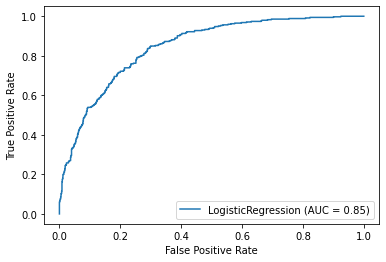

In [194]:
plot_roc_curve(clf, X_test, y_test)
plt.show()

**solver** - метод решения задачи минимизации штрафной функции:
* **newton-cg** - метод Ньютона. Основан на подсчете матриц вторых производных (весьма затратный по времени для больших датасетов);
* **lbfgs** - Stands for Limited-memory Broyden–Fletcher–Goldfarb–Shanno. Обновляет матрицу вторых производных с оценками градиента. Хранит информацию лишь о нескольких предыдущих шагах алгоритма;
* **liblinear** - Library for Large Linear Classification. Алгоритм минимизации функции потерь, путём спуска по одной координате в цикле (одномерная задача оптимизации);
* **sag** - метод среднего стохастического градиентного спуска. Задача минимизации функции потерь путём движения в сторону антиградента (применим для больших датасетов);
* **saga** - вариация метода стохастического градиентного спуска с l1-регуляризацией (обучается, как правило, быстрее, чем **sag**).

In [195]:
cv = KFold(n_splits=5, shuffle=True, random_state=241)
parameters = {'solver': ('newton-cg', 'lbfgs','liblinear', 'sag', 'saga')}
grid_clf = GridSearchCV(estimator=LogisticRegression(class_weight={0: 0.3, 1: 0.7}, max_iter=200),
                        param_grid=parameters, scoring='f1', cv=cv)

In [196]:
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=241, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight={0: 0.3, 1: 0.7},
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=200, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [197]:
pd.DataFrame.from_dict(grid_clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.092296,0.022948,0.001591,0.000486,newton-cg,{'solver': 'newton-cg'},0.632375,0.611191,0.632399,0.622951,0.651235,0.630030,0.013159,2
1,0.045283,0.004928,0.001926,0.000228,lbfgs,{'solver': 'lbfgs'},0.632375,0.611191,0.632399,0.622951,0.651235,0.630030,0.013159,2
2,0.022785,0.001134,0.001851,0.000454,liblinear,{'solver': 'liblinear'},0.631420,0.611191,0.632399,0.624071,0.651235,0.630063,0.013020,1
3,0.116943,0.003848,0.001717,0.000413,sag,{'solver': 'sag'},0.632375,0.611191,0.632399,0.622951,0.651235,0.630030,0.013159,2
4,0.231377,0.023347,0.001802,0.000403,saga,{'solver': 'saga'},0.632375,0.611191,0.632399,0.622951,0.651235,0.630030,0.013159,2


In [198]:
grid_clf.best_estimator_

LogisticRegression(C=1.0, class_weight={0: 0.3, 1: 0.7}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=200, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [199]:
y_pred = grid_clf.best_estimator_.predict_proba(X_test)
print_metrics(y_test, y_pred, model='log_reg')

Accuracy: 75.308% 
Precision: 52.326%
Recall: 78.261%
F1 score: 62.718% 
ROC-AUC score: 84.581%


In [200]:
print(classification_report(y_test, np.argmax(y_pred, axis=1)))

              precision    recall  f1-score   support

         0.0       0.90      0.74      0.82       955
         1.0       0.52      0.78      0.63       345

    accuracy                           0.75      1300
   macro avg       0.71      0.76      0.72      1300
weighted avg       0.80      0.75      0.77      1300



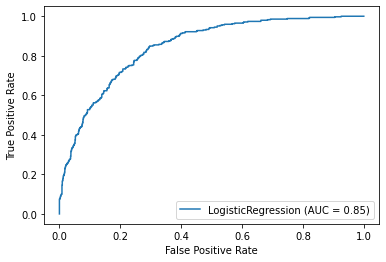

In [201]:
plot_roc_curve(grid_clf.best_estimator_, X_test, y_test)
plt.show()

**AUC-ROC** - это метрика, которая позволяет графически просто проиллюстрировать качество модели машинного обучения.

В единичном квадрате в осях False Positive Rate: $FPR = \frac{TP}{TP + FN}$ - и True Positive Rate: $TPR = \frac{FP}{FP + TN}$ - строится кривая следующим образом:

Вероятности ответа модели на тестовой выборке сортируются по убыванию вместе с соответствующей меткой класса. В случае, когда модель дала правильный ответ (**TP**, **TN**), график идет вверх на определенную величину, в случае ложного ответа (**FP**, **FN**) кривая уходит вправо.

График начинается в точке $(0, 0)$ и заканчивается в точке $(1, 0)$.

Считается, что чем выше кривая находится над прямой $y = x$, тем лучше качество работы классификатора. 

Однако, не всегда данная метрика применима. Например, когда мы не можем количественно описать принадлежность объекта к определенному классу. Также он не является уместным показателем, когда важность **FP** и **FN** у нас сильно рознится и надо оптимизировать один тип ошибки классификации.

** Важность признаков **

In [202]:
model_coefs = grid_clf.best_estimator_.coef_[0]
max_indices = (-np.abs(model_coefs)).argsort()[:3]
model_coefs[max_indices]

array([-1.33197243,  0.5843871 , -0.41034001])

In [203]:
X_df.iloc[:, max_indices]

,Tenure,Total Charges,Monthly Charges
0,1,29.85,29.85
1,34,1889.50,56.95
2,2,108.15,53.85
3,45,1840.75,42.30
4,2,151.65,70.70
...,...,...,...
6494,26,786.50,29.80
6495,1,69.65,69.65
6496,40,4086.30,101.85
6497,52,5364.80,103.05


Как можно видеть, важную роль в данных играет сумма итоговых сборов за услуги.

Вспомните курс "Нейронные сети и генетические алгоритмы", найдите в sklearn реализацию линейного варианта SVM и обучите на данных с параметрами по вашему выбору и сравните качество с логистической регрессией. 

Можно ли вычислять ROC-AUC для SVM?

In [204]:
from sklearn.svm import LinearSVC

In [205]:
svm_clf = LinearSVC(class_weight={0: 0.3, 1: 0.7}, max_iter=1500)
svm_clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight={0: 0.3, 1: 0.7}, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1500,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [206]:
y_pred = svm_clf.decision_function(X_test)
print_metrics(y_test, y_pred, model='svm')

Accuracy: 75.154% 
Precision: 52.099%
Recall: 79.130%
F1 score: 62.831% 
ROC-AUC score: 84.370%


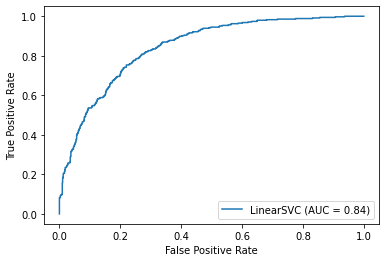

In [207]:
plot_roc_curve(svm_clf, X_test, y_test)
plt.show()

Да, в SVM можно использовать эту метрику, несмотря на то, что она выдает ответ -1 и 1 по сути своего алгоритма:

* можно либо выставить параметр probability=True и можно получить вероятностную оценку принадлежности объекта к определенному классу;
* можно вычислить расстояние от объекта до разделяющей гиперплоскости в алгоритме SVM - это определит степень принадлежности объекта классу.

По факту, эти два решения являются эквивалентными.

## Задание 4.5 * (Нужно выполнить, если нужна общая оценка 10)

Метрика Lift показывает во сколько раз полученная модель лучше случайного угадывания. [Теория](https://en.wikipedia.org/wiki/Lift_(data_mining))

Вам необходимо:
1. Разобраться с метрикой lift (и уметь ее объяснить):

    a. https://www.kdnuggets.com/2016/03/lift-analysis-data-scientist-secret-weapon.html
    
    b. https://stats.stackexchange.com/questions/17119/lift-measure-in-data-mining


2. Реализовать lift-score.

def lift_score(y_true, y_proba, top_ratio):

    pass

    a. y_true — вектор целевой переменной 
    b .y_proba — предсказание модели
    c. top_ratio — доля выборки, для которой рассчитывается lift-score



P.S. Это задание для вас подготовил мой коллега Антон Кулеш, потому что lift - очень полезная метрика, которая заслуживает внимательного ознакомления

In [208]:
def lift_score(y_true, y_prob, top_ratio):
    y_prob = y_prob[:, 1]
    y_data = sorted(zip(y_prob, y_true), key=lambda x: x[0], reverse=True)

    top_y = np.array(y_data[:int(top_ratio*len(y_data))])

    return np.mean(top_y[:, 1]) / np.mean(y_true)

In [209]:
y_pred = clf.predict_proba(X_test)
[(np.round(i, 1), lift_score(y_test, y_pred, top_ratio=i)) for i in np.arange(0.1, 1.1, 0.1)]

[(0.1, 2.753623188405797),
 (0.2, 2.536231884057971),
 (0.3, 2.2028985507246377),
 (0.4, 1.9782608695652175),
 (0.5, 1.7507246376811594),
 (0.6, 1.5555555555555554),
 (0.7, 1.383022774327122),
 (0.8, 1.2318840579710144),
 (0.9, 1.104669887278583),
 (1.0, 1.0)]

# Задание 5

Произведите анализ предсказаний по трем направлениям. Задание считается выполненным, если есть **четкие ответы** на каждый из трех вопросов и **сопутствующий код**:

1. Какие признаки получились самыми важными, а какие лишними? Как правильно посчитать значимость закодированных категориальных признаков? Hint: используйте атрибут coef_ у логистической регрессии
2. Найдите 10 людей с самой высокой и самой низкой вероятностью уйти в отток. Попробуйте описать причины такого поведения
3. И, наконец, подумайте, какую пользу может извлечь оператор из вашей модели. Опишите хотя бы один пример использования

## Пункт 1

### Наиболее важные признаки

In [210]:
model_coefs = grid_clf.best_estimator_.coef_[0]
max_indices = (-np.abs(model_coefs)).argsort()[:3]
model_coefs[max_indices]

array([-1.33197243,  0.5843871 , -0.41034001])

In [211]:
X_df.iloc[:, max_indices]

,Tenure,Total Charges,Monthly Charges
0,1,29.85,29.85
1,34,1889.50,56.95
2,2,108.15,53.85
3,45,1840.75,42.30
4,2,151.65,70.70
...,...,...,...
6494,26,786.50,29.80
6495,1,69.65,69.65
6496,40,4086.30,101.85
6497,52,5364.80,103.05


### Наименее важные признаки

In [212]:
model_coefs = grid_clf.best_estimator_.coef_[0]
min_indices = (np.abs(model_coefs)).argsort()[:3]
model_coefs[min_indices]

array([-0.00465748, -0.00518625, -0.01347821])

In [213]:
X_df.iloc[:, min_indices]

,Online Backup_Yes,Gender,Contract_One year
0,1,0,0
1,0,1,1
2,1,1,0
3,0,1,1
4,0,0,0
...,...,...,...
6494,0,0,0
6495,0,1,0
6496,0,1,0
6497,1,1,0


Важность категориальных признаков измеряется посредством их перевода в числовые. В нашем случае dummy-кодирование позволило представить категориальные признаки в ином виде, где каждый столбец является индикатором той или иной категории и по этим столбцам можно определить значимость определенной категории.

## Пункт 2

In [216]:
churn_prob = y_pred[:, 1]

min_indices = (churn_prob).argsort()[:10]
print(y_testID[min_indices])

max_indices = (-churn_prob).argsort()[:10]
print(y_testID[max_indices])

['4277-BWBML' '7083-MIOPC' '5787-KXGIY' '8229-BUJHX' '1591-XWLGB'
 '8750-QWZAJ' '8285-ABVLB' '2607-DHDAK' '5799-JRCZO' '0480-KYJVA']
['5567-WSELE' '7024-OHCCK' '8884-ADFVN' '4910-GMJOT' '1415-YFWLT'
 '3068-OMWZA' '5192-EBGOV' '4102-OQUPX' '5383-MMTWC' '3158-MOERK']


### Наиболее низкая вероятность оттока

In [220]:
df[df['CustomerID'].isin(y_testID[min_indices])]

,CustomerID,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
233,7083-MIOPC,0,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.25,1566.90,No
932,5787-KXGIY,1,0,Yes,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.30,1304.80,No
1514,5799-JRCZO,0,0,No,Yes,63,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.50,1215.10,No
1945,8229-BUJHX,0,0,Yes,Yes,71,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.50,1500.95,No
2338,4277-BWBML,1,0,Yes,Yes,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.95,1322.85,No
3625,1591-XWLGB,0,0,Yes,No,71,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.85,1379.60,No
3935,8285-ABVLB,0,0,Yes,No,70,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.85,1328.35,No
4006,2607-DHDAK,1,0,Yes,Yes,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.80,1414.65,No
5555,8750-QWZAJ,0,0,Yes,Yes,70,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.80,1378.75,No
6423,0480-KYJVA,0,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.25,1784.50,No


### Наиболее высокая вероятность оттока

In [221]:
df[df['CustomerID'].isin(y_testID[max_indices])]

,CustomerID,Gender,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
585,5192-EBGOV,0,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,85.70,85.70,Yes
969,3158-MOERK,0,0,No,No,2,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,96.00,174.80,Yes
1410,7024-OHCCK,0,1,No,No,2,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,93.85,170.85,Yes
1600,3068-OMWZA,1,1,No,No,1,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,88.80,88.80,Yes
2577,4910-GMJOT,0,0,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.60,94.60,Yes
2821,4102-OQUPX,1,1,Yes,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.40,74.40,Yes
5783,1415-YFWLT,0,1,No,No,1,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,89.30,89.30,Yes
5937,5383-MMTWC,0,1,Yes,No,8,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.00,613.40,Yes
5989,5567-WSELE,1,1,Yes,No,3,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.60,279.55,Yes
6365,8884-ADFVN,1,1,Yes,No,7,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.95,700.85,Yes


Как можно заметить у каждой десятки есть свои особенности. 

* Те, кто **наименее вероятно покинут оператора**, пользуются лишь сотовой связью, в связи с чем достаточно выгодно заключать контракт на 2-годовой основе. Можно заметить, что эти клиенты пользуются услугами оператора достаточно долго (от 5 до 6 лет) и платят маленькую сумму за его услуги в месяц.

* Если говорить о тех, кто **покинул оператора**, то они, вероятнее всего, хотели попробовать воспользоваться его услугами, посему выбрали контракт на месячной основе, и пользовались его услугами не очень долго (от 1 до 8 месяцев). Причем все использовали оптоволоконную сеть и пользовались дополнительными услугами, которые предоставлялись оператором при подключении к интернету. Плата за месяц в совокупности выходила на несколько порядков выше, чем у тех, кто пользуется лишь сотовой связью. Вероятнее всего, покинувшие решили, что услуги оператора не выгодные, поэтому ушли.

## Пункт 3

Данная модель может использоваться по выявлению пользователей, которые потенциально могут покинуть сотового оператора. В таком случае, определяется выборка людей, которым можно сделать какое-нибудь выгодное предложение, чтобы он остался с оператором. 

# Задание 6* (Нужно выполнить, если нужна общая оценка 10)

Повторите весь процесс моделирования для датасета adult.csv (классический и фундаментальный датасет для машинного обучения). Дополнительно необходимо ответить на следующий вопрос:
1. Найдите людей с самыми уверенными предсказаниями зарплаты выше и ниже 50k. Какие признаки на это повлияли сильнее всего? Почему?

In [100]:
df = pd.read_csv('adult.csv')

In [101]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [102]:
df.shape

(48842, 15)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## Описание признаков датасета

* **age** - возраст;
* ** workclass** - вид самозанятости (категориальный);
* ** fnlwgt** - количество людей, которые по данным переписи имеют схожую демографическую характеристику;
* ** education** - образование (категориальный);
* ** educational-num** - высшая степень образование в числовой форме;
* ** marital-status** - семейное положение (категориальный);
* ** occupation** - должность;
* ** relationship** - женат/замужем;
* ** race** - раса (категориальный);
* ** gender** - гендер (бинарный);
* ** capital-gain** - прирост капитала;
* ** capital-loss** - потери капитала;
* ** hours-per-week** - количество часов работы в неделю;
* ** native-country** - страна рождения;
* ** income** - доход (бинарный).

Целевой столбец - **income**. В рамках задачи требуется определить порог заработка каждого человека (<=50k$, >50k$).

In [104]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Как видно, явных пропусков в данных нет, однако...

In [105]:
df.loc[df['capital-gain'] == 0]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [106]:
df.loc[df['capital-loss'] == 0]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Слишком много нулей в столбцах о приросте и потери капитала, что весьма сомнительно в контексте репрезентативности этих признаков в данных.

In [155]:
X_df, y = df.loc[:, df.columns != 'income'].copy(deep=True), df.loc[:, 'income'].copy(deep=True)

## Преобрование бинарных и категориальных признаки

In [156]:
y = y.apply(lambda x: 1 if x == '>50K' else 0)

In [157]:
X_df['gender'] = X_df['gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [158]:
X_df = pd.get_dummies(X_df, drop_first=True)

In [159]:
X, y = X_df.to_numpy(dtype=float), y.to_numpy(dtype=float)

## Стандартизация данных

In [160]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [161]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42)

In [162]:
np.mean(y_train), np.mean(y_test)

(0.24049855398868783, 0.2344149861807759)

Датасет несбалансированный.

## Обучение классификатора

In [163]:
clf = LogisticRegression(class_weight={0: 0.3, 1: 0.7}, max_iter=500)

In [164]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight={0: 0.3, 1: 0.7}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=500, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Проверка качества работы модели

In [165]:
y_pred = clf.predict_proba(X_test)

In [166]:
print_metrics(y_test, y_pred, model='log_reg')

Accuracy: 83.509% 
Precision: 61.298%
Recall: 80.437%
F1 score: 69.575% 
ROC-AUC score: 91.072%


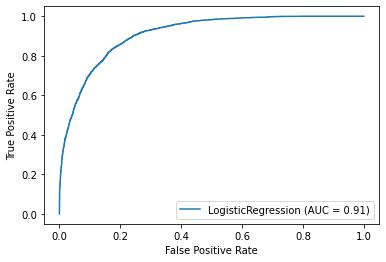

In [167]:
plot_roc_curve(clf, X_test, y_test)
plt.show()

## Наиболее важные признаки

In [168]:
model_coefs = clf.coef_[0]
max_indices = (-np.abs(model_coefs)).argsort()[:3]
model_coefs[max_indices]

array([2.31966326, 1.20173047, 0.54882992])

In [169]:
X_df.iloc[:, max_indices]

,capital-gain,marital-status_Married-civ-spouse,educational-num
0,0,0,7
1,0,1,9
2,0,1,12
3,7688,1,10
4,0,0,10
...,...,...,...
48837,0,1,12
48838,0,1,9
48839,0,0,9
48840,0,0,9


## Наименее важные признаки

In [196]:
min_indices = (np.abs(model_coefs)).argsort()[:3]
model_coefs[min_indices]

array([ 0.00056208, -0.00077862,  0.00139203])

In [197]:
X_df.iloc[:, min_indices]

,education_Assoc-voc,native-country_Haiti,native-country_Ecuador
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
48837,0,0,0
48838,0,0,0
48839,0,0,0
48840,0,0,0


Очень удивительно, что столбец **capital-gain** оказался самым важным, несмотря на пропуски в данных. Видимо, надо поискать хороший датасет, для еще большего качества модели, раз она уже на текущий выдает вполне хороший результат.